# Análise de planos pré-pagos telecomunicações Megaline

Essa análise tem por objetivo a avaliação dos planos que dão mais receita para que possamos ajustar o direcionamento do orçamento de publicidade e propaganda.

## Iniciação

Serão importado as bibliotecas necessárias para realização, carregados os dataframes e visualizar as informações contidas em cada dataframe.

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
df_cls = pd.read_csv('/datasets/megaline_calls.csv')
df_int = pd.read_csv('/datasets/megaline_internet.csv')
df_msg = pd.read_csv('/datasets/megaline_messages.csv')
df_pln = pd.read_csv('/datasets/megaline_plans.csv')
df_usr = pd.read_csv('/datasets/megaline_users.csv')

In [3]:


df_cls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
df_cls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
df_cls['call_date'] = pd.to_datetime(df_cls['call_date'])

In [6]:
df_cls['id'] = df_cls['id'].str.replace('_', '').astype(int)

In [7]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [8]:
df_int.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [9]:
df_int['session_date'] = pd.to_datetime(df_int['session_date'])

In [10]:
df_int['id'] = df_int['id'].str.replace('_', '').astype(int)

In [11]:
df_msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
df_msg.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [13]:
df_msg['message_date'] = pd.to_datetime(df_msg['message_date'])

In [14]:
df_msg['id'] = df_msg['id'].str.replace('_', '').astype(int)

In [15]:
df_pln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [16]:
df_pln.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [17]:
df_usr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [18]:
df_usr.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [19]:
df_usr['churn_date'] = pd.to_datetime(df_usr['churn_date'])

In [20]:
df_usr['reg_date'] = pd.to_datetime(df_usr['reg_date'])

### Conclusão

Foram avaliados dos dados pertencentes as cinco dataframes, nesta verificação ficou evidente que temos dados com classificação de data constando como object, todos os dados desse tipo foram transformados para o tipo 'datetime'.
Foi observado que os usuários, da coluna `user_id` possuíam um underline, esse caracter foi retirado para que não atrapalhasse nossas iterações entre dataframes.
Os dataframes não possuem valores ausentes que comprometam a analise dos dados.


## Encontrando o número de chamadas feitas por mês:

In [21]:
df_cls['month'] = df_cls['call_date'].dt.month

In [22]:
result_cls = df_cls.groupby(['id', pd.Grouper(key='call_date', freq='M')]).agg({'id': 'count', 'duration': 'sum'})

In [23]:
result_cls.rename(columns={'id': 'num_calls', 'duration': 'total_duration'})

,,num_calls,total_duration
id,call_date,,
10010,2018-09-30,1,10.06
10011,2018-10-31,1,1.00
10012,2018-10-31,1,15.83
10014,2018-12-31,1,0.00
10015,2018-12-31,1,6.27
...,...,...,...
14651048,2018-09-30,1,0.00
14651050,2018-08-31,1,0.00
14651051,2018-10-31,1,14.76


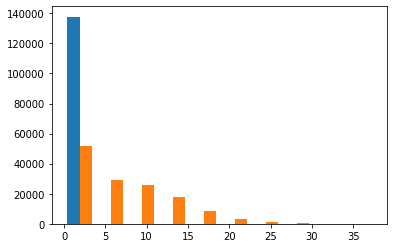

In [24]:
plt.hist(result_cls, bins=10)
plt.show()

### Volume de mensagens de texto por mês

In [25]:
# Adicionar colunas de mês e ano
df_msg['month'] = df_msg['message_date'].dt.month

In [26]:
df_msg['year'] = df_msg['message_date'].dt.year

In [27]:
# Agrupar por usuário, mês e ano, contando o número de mensagens
result_msg = df_msg.groupby(['user_id', 'year', 'month']).agg({'id': 'count'})

In [28]:
# Renomear a coluna resultante
result_msg.rename(columns={'id': 'num_messages'})

num_messages
user_id year month              
1000    2018 12               11
1001    2018 8                30
             9                44
             10               53
             11               36
...                          ...
1496    2018 9                21
             10               18
             11               13
             12               11
1497    2018 12               50

[1806 rows x 1 columns]

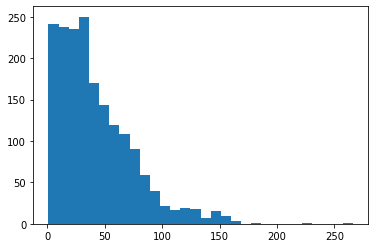

In [29]:
plt.hist(result_msg, bins=30)
plt.show()

### Volume de dados de internet por mês

In [30]:
# Adicionar colunas de mês e ano
df_int['month'] = df_int['session_date'].dt.month

In [31]:
df_int['year'] = df_int['session_date'].dt.year

In [32]:
# Agrupar por usuário, mês e ano, somando o volume de dados
result_int = df_int.groupby(['user_id', 'year', 'month']).agg({'mb_used': 'sum'})

In [33]:
# Renomear a coluna resultante
result_int.rename(columns={'mb_used': 'data_volume'})

data_volume
user_id year month             
1000    2018 12         1901.47
1001    2018 8          6919.15
             9         13314.82
             10        22330.49
             11        18504.30
...                         ...
1498    2018 12        23137.69
1499    2018 9         12984.76
             10        19492.43
             11        16813.83
             12        22059.21

[2277 rows x 1 columns]

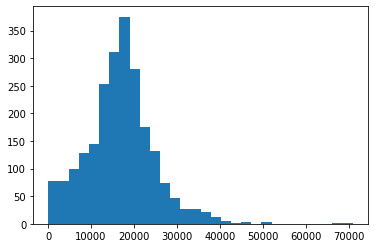

In [34]:
plt.hist(result_int, bins=30)
plt.show()

### Conclusão

O volume de internet utilizado por mês é muito superior às ligações e mensagens de texto.

## Calculando a receita mensal para cada usuário.

In [35]:
# Juntando os dataframes
df = pd.merge(df_cls, df_int, on=['id', 'user_id'], how='outer')

In [36]:
df = pd.merge(df, df_msg, on=['id', 'user_id'], how='outer')

In [37]:
df = pd.merge(df, df_usr[['user_id', 'plan']], on='user_id', how='left')

In [38]:
df

,id,user_id,call_date,duration,month_x,session_date,mb_used,month_y,year_x,message_date,month,year_y,plan
0,100093,1000,2018-12-27,8.52,12.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,ultimate
1,1000145,1000,2018-12-27,13.66,12.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,ultimate
2,1000247,1000,2018-12-27,14.48,12.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,ultimate
3,1000309,1000,2018-12-28,5.76,12.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,ultimate
4,1000380,1000,2018-12-30,4.22,12.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178875,1497526,1497,NaT,NaN,NaN,NaT,NaN,NaN,NaN,2018-12-24,12.0,2018.0,ultimate
178876,1497536,1497,NaT,NaN,NaN,NaT,NaN,NaN,NaN,2018-12-24,12.0,2018.0,ultimate
178877,1497547,1497,NaT,NaN,NaN,NaT,NaN,NaN,NaN,2018-12-31,12.0,2018.0,ultimate
178878,1497558,1497,NaT,NaN,NaN,NaT,NaN,NaN,NaN,2018-12-24,12.0,2018.0,ultimate


In [39]:
# Calculando o total de chamadas, mensagens e dados por usuário
df_user_totals = df.groupby(['user_id', 'plan'])[['duration', 'mb_used', 'message_date']].agg({'duration': 'sum', 'mb_used': 'sum', 'message_date': 'count'})

In [40]:
df_user_totals.columns = ['total_minutes', 'total_mb', 'total_messages']

In [41]:
df_user_totals.reset_index(inplace=True)

In [42]:
# Juntando os dados do usuário com os totais
df_user_totals = pd.merge(df_usr[['user_id', 'plan']], df_user_totals, on='plan', how='left')

In [43]:
# Calculando a receita mensal para cada usuário
df_user_totals['monthly_revenue'] = np.where(df_user_totals['plan'] == 'surf', 
                                             np.maximum(0, df_user_totals['total_minutes'] - 500) * 0.03 +
                                             np.maximum(0, df_user_totals['total_mb'] - 15360) / 1024 * 10 +
                                             np.maximum(0, df_user_totals['total_messages'] - 50) * 0.03 +
                                             20,
                                             np.maximum(0, df_user_totals['total_minutes'] - 3000) * 0.01 +
                                             np.maximum(0, df_user_totals['total_mb'] - 30720) / 1024 * 7 +
                                             np.maximum(0, df_user_totals['total_messages'] - 1000) * 0.01 +
                                             70)

In [44]:
df_user_totals

,user_id_x,plan,user_id_y,total_minutes,total_mb,total_messages,monthly_revenue
0,1000,ultimate,1000,116.83,1901.47,11,70.000000
1,1000,ultimate,1006,64.11,34187.19,154,93.701494
2,1000,ultimate,1008,1473.31,55473.04,84,239.210234
3,1000,ultimate,1011,2744.87,131778.60,371,760.830273
4,1000,ultimate,1013,203.37,20113.92,16,70.000000
...,...,...,...,...,...,...,...
138159,1499,surf,1494,2672.66,91389.19,174,831.372359
138160,1499,surf,1495,1666.41,98890.96,0,870.724331
138161,1499,surf,1496,1376.21,64268.64,65,524.359737
138162,1499,surf,1498,3029.97,227525.13,0,2167.824198


In [70]:
# Criando coluna com a região
df_usr['region'] = df_usr['city'].str.extract(r',\s(.+?)\sMSA')

In [90]:
df_user_totals['region'].unique()

array(['GA', 'WA', 'NV', 'OK', 'TX', 'CA', 'MI', 'FL', 'OH', 'IL-IN-WI',
       'TN', 'NY-NJ-PA', 'PA', 'DC-VA-MD-WV', 'IN', 'NE-IA',
       'PA-NJ-DE-MD', 'AL', 'NC-SC', 'CO', 'NM', 'MA-NH', 'AZ', 'OR-WA',
       'OH-KY-IN', 'SC', 'NY', 'TN-MS-AR', 'KY-IN', 'RI-MA', 'UT', 'HI',
       'CT', 'LA', 'VA-NC', 'MD', 'WI', 'VA', 'MO-IL', 'MN-WI', 'MO-KS',
       'NC'], dtype=object)

In [72]:
# juntar df_user_totals com df_usr
df_user_totals = df_user_totals.merge(df_usr[['user_id', 'region']], left_on='user_id_x', right_on='user_id', how='left')

In [82]:
# agrupar por região e sum de monthly_revenue
revenue_by_region = round(df_user_totals.groupby('region')['monthly_revenue'].sum(), 2)

In [83]:
revenue_by_region

region
AL               592961.84
AZ              2035321.66
CA             12857721.00
CO              1900711.38
CT              1213184.04
DC-VA-MD-WV     2035321.66
FL              4110688.10
GA              1913495.80
HI              1145878.90
IL-IN-WI        3059374.70
IN              1051313.40
KY-IN            984008.26
LA              1738840.74
MA-NH           2588238.72
MD               916703.12
MI              2857459.28
MN-WI           1711580.38
MO-IL            525656.70
MO-KS            458351.56
NC               458351.56
NC-SC           1347794.32
NE-IA            458351.56
NM               458351.56
NV               956747.90
NY              1375054.68
NY-NJ-PA       15096649.61
OH              1576970.10
OH-KY-IN        1509664.96
OK              1051313.40
OR-WA           1671535.60
PA               822137.62
PA-NJ-DE-MD     2924764.42
RI-MA            687527.34
SC               794877.26
TN              1940756.16
TN-MS-AR         296480.92
TX              69954

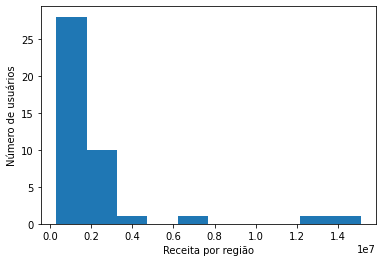

In [87]:
plt.hist(revenue_by_region, bins=10)
plt.xlabel('Receita por região')
plt.ylabel('Número de usuários')
plt.show()

### Conclusão

Nesta etapa juntei os datafrmes, fiz um agrupamento pelas colunas `user_id` e `plan` para avaliar os planos utilizados por cada usuário e entender qual plano é o mais utilizado pelos nossos clientes.

## Analisando os dados

In [45]:
# Separando os dados por plano
df_surf = df_user_totals[df_user_totals['plan'] == 'surf']
df_ultimate = df_user_totals[df_user_totals['plan'] == 'ultimate']

In [46]:
#Minutos
df_surf['total_minutes'].describe()

count    112887.000000
mean       1911.985706
std        1621.170746
min           0.000000
25%         665.630000
50%        1450.310000
75%        2776.010000
max        8950.280000
Name: total_minutes, dtype: float64

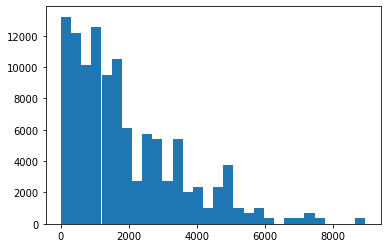

In [47]:
plt.hist(df_surf['total_minutes'], bins=30)
plt.show()

In [48]:
#Mensagem
df_ultimate['total_minutes'].describe()

count    25277.000000
mean      1862.796306
std       1598.745781
min          0.000000
25%        684.920000
50%       1366.640000
75%       2683.020000
max       8024.090000
Name: total_minutes, dtype: float64

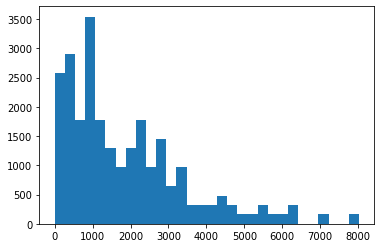

In [49]:
plt.hist(df_ultimate['total_minutes'], bins=30)
plt.show()

In [50]:
df_surf['total_messages'].describe()

count    112887.000000
mean        147.189189
std         182.915296
min           0.000000
25%          16.000000
50%          84.000000
75%         210.000000
max        1233.000000
Name: total_messages, dtype: float64

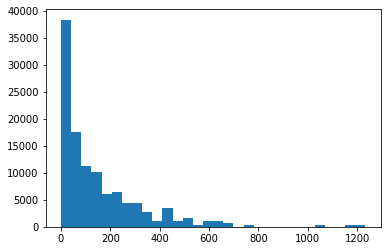

In [51]:
plt.hist(df_surf['total_messages'], bins=30)
plt.show()

In [52]:
df_ultimate['total_messages'].describe()

count    25277.000000
mean       172.210191
std        198.568074
min          0.000000
25%         22.000000
50%         98.000000
75%        244.000000
max       1288.000000
Name: total_messages, dtype: float64

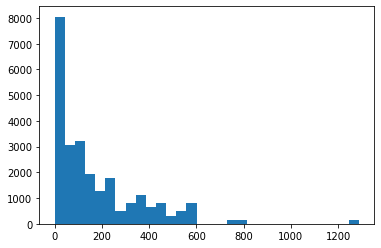

In [53]:
plt.hist(df_ultimate['total_messages'], bins=30)
plt.show()

In [54]:
# Dados
df_surf['total_mb'].describe()

count    112887.000000
mean      78216.756547
std       59716.364137
min           0.000000
25%       30068.850000
50%       63050.670000
75%      117074.610000
max      312518.640000
Name: total_mb, dtype: float64

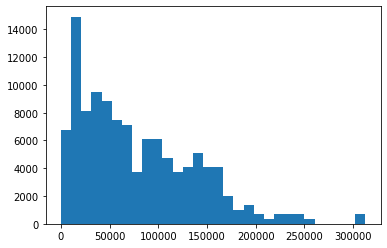

In [55]:
plt.hist(df_surf['total_mb'], bins=30)
plt.show()

In [56]:
df_ultimate['total_mb'].describe()

count     25277.000000
mean      78946.393503
std       66338.308384
min         233.170000
25%       28925.070000
50%       59418.940000
75%      106827.620000
max      390159.350000
Name: total_mb, dtype: float64

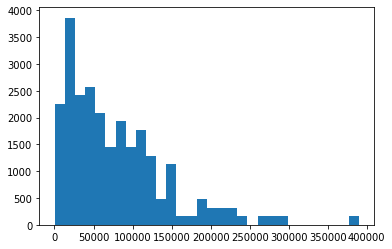

In [57]:
plt.hist(df_ultimate['total_mb'], bins=30)
plt.show()

### Conclusão

Realizando uma avaliação por plano o plano Surf apresentou uma maior média de minutagem em ligações e o plano Ultimate apresentou maiores médias em total de internet e menssagens.

## Teste de Hipóteses

Serão realizados dois testes de hipótese:

O primeiro teste:
* hipótese nula: A receita média dos usuários dos planos Ultimate e Surf são iguais.
* Hipótese alternativa: A receita média dos usuários dos planos Ultimate e Surf são diferentes.


In [58]:
from scipy.stats import ttest_ind

In [59]:
# Separando os dados por plano
revenue_surf = df_user_totals[df_user_totals['plan'] == 'surf']['monthly_revenue']
revenue_ultimate = df_user_totals[df_user_totals['plan'] == 'ultimate']['monthly_revenue']

In [60]:
# Calculando o teste t de Student
t_stat, p_value = ttest_ind(revenue_surf, revenue_ultimate, equal_var=False)

In [61]:
# Definindo o nível de significância
alpha = 0.05

In [62]:
# Interpretando os resultados
if p_value < alpha:
    print('Rejeitamos a hipótese nula. Há evidências de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.')
else:
    print('Não podemos rejeitar a hipótese nula. Não há evidências de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.')

Rejeitamos a hipótese nula. Há evidências de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.


O segundo teste:
* hipótese nula: a receita média dos usuários da área de NY-NJ.
* Hipótese alternativa: A receita média dos usuários dos planos Ultimate e Surf são diferentes.

In [93]:
#separar os dados da região NY-NJ daqueles das outras regiões
revenue_nynj = df_user_totals.loc[df_user_totals['region'] == 'NY-NJ-PA', 'monthly_revenue']
revenue_other = df_user_totals.loc[df_user_totals['region'] != 'NY-NJ-PA', 'monthly_revenue']


In [94]:
#calcular as médias das amostras
mean_nynj = np.mean(revenue_nynj)
mean_other = np.mean(revenue_other)

In [95]:
t, p = ttest_ind(revenue_nynj, revenue_other, equal_var=False)

In [96]:
print(f'Média de receita em NY-NJ: {mean_nynj:.2f}')
print(f'Média de receita em outras regiões: {mean_other:.2f}')
print(f'Valor de t: {t:.2f}')
print(f'Valor p: {p:.3f}')

Média de receita em NY-NJ: 652.97
Média de receita em outras regiões: 638.28
Valor de t: 3.42
Valor p: 0.001


### Conclusão

O teste de hipótese foi realizado com base na receita dos usuários para cada plano, pois através da receita conseguimos saber se o poder aquisitivo é entre os clientes dos planos são iguais ou difentes. Com essa análise podemos entender se tentamos aplicar uma propaganda para os clientes do plano Ultimate como aplicaremos para os clientes do plano Surf.

Através da análise, entendmos que a hipótese nula não foi aceita e as recentas entre usuáris de ambos os planos são diferentes.

No teste de hipóteses realizado com a receita média dos usuários da região NY-NJ e de outras regiões, o resultado foi um valor-p de 0.001, menor que o nível de significância de 0.05. Portanto, pode-se rejeitar a hipótese nula e concluir que há evidências estatísticas para aceitar a hipótese alternativa de que a receita média dos usuários da região NY-NJ é diferente da receita média dos usuários de outras regiões.

## Conclusão Geral

Através da análise entendemos os usuários do plano Ultimate apresenta mais gasto em internet e mensagem de texto, já os usários do plano Surf apresentam mais gastos em ligações, as receitas dos usuários são diferentes. Os gastos com o plano Ultimate pelos usários é maior.